In [35]:
import numpy as np
import math
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
def plot_histogram(data, rng=[0, 2047]):
    data_filt = data[data >= rng[0]]
    data_filt = data_filt[data_filt < rng[1]]
    bins = np.linspace(0, 2047, 2048)
    fig = plt.figure(dpi=500)
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.hist(data_filt, bins=bins, histtype='step')
    ax1.set_xlim(rng[0], rng[1])
    ax1.set_yscale('log')
    
def time_series(df, frequency, components):
    #print(components)
    [bins, names] = components
    df['UTC'] = pd.to_datetime(df['UTC'])
    df.index = df['UTC']
    comps = separate_spectra(df, 'Height', bins)
    #print(components)
    f = {'Height':[list_height, 'count', 'mean', 'min', 'max', 'sum', 'std'], 'Baseline':['mean', 'min', 'max', 'std']}
    data_components = []
    for idx, i in enumerate(comps):
        #print(i)
        temp = i.groupby(pd.Grouper(freq=frequency)).agg(f)
        data_components.append((temp, names[idx]))
    return data_components

def plot_time_series(data, components, attr, stat):
    [bins, names] = components
    
    fig = plt.figure(dpi=500)
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()

    maximum_1, maximum_2 = 0, 0
    for idx, (df, comp) in enumerate(data):
        if comp in names:
            if comp=='total' or comp=='terrestrial':
                if maximum_1 < max(df[attr][stat]):
                    maximum_1 = max(df[attr][stat])
                style = {'total':'-', 'terrestrial':'--'}
                ax1.plot(df.index, df[attr][stat], linestyle=style[comp], color='k', label=comp)
            else:
                if maximum_2 < max(df[attr][stat]):
                    maximum_2 = max(df[attr][stat])
                style = {'thunderstorm':'-', 'cosmic':'--'}
                ax2.step(df.index, df[attr][stat], linestyle=style[comp], color='gray', label=comp)

    ax1.set_ylim(top=1.2*maximum_1)
    ax2.set_ylim(top=1.2*maximum_2)
    #ax1.set_title(title_dict[attr] + ' - ' + frequency + ' integration time')
    ax1.set_xlabel('UTC [-]')
    #ax1.set_ylabel(ylabel_dict[stat])
    #ax2.set_ylabel(ylabel_dict[stat])
    ax1.tick_params(axis='y', labelcolor='k')
    ax2.tick_params(axis='y', labelcolor='gray')
    ax2.yaxis.label.set_color('gray')
    ax1.legend(loc=2)
    ax2.legend(loc=1)

def component_correlation(data, components, attribute, stat):
    if len(components) != 2:
        print('Number of components must equal to 2.')
        return -1
    else:
        df_x = extract_component(data, components[0])
        df_y = extract_component(data, components[1])
    x = df_x[attribute][stat]
    y = df_y[attribute][stat]
    #x = x[1:]
    print(x, y)
    plot_correlation(x, y)
        
def plot_correlation(x, y):
    fig = plt.figure(dpi=500)
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.scatter(x, y)
    
def extract_component(data, comp):
    for df, name in data:
        if (name == comp):
            return df
        
def list_height(x):
    return list(x)

def separate_spectra(df, attr, bins):
    output = []
    for left, right in bins:
        mask = (df[attr] >= left) & (df[attr] < right)
        temp = df.loc[mask]
        output.append(temp)
    return output

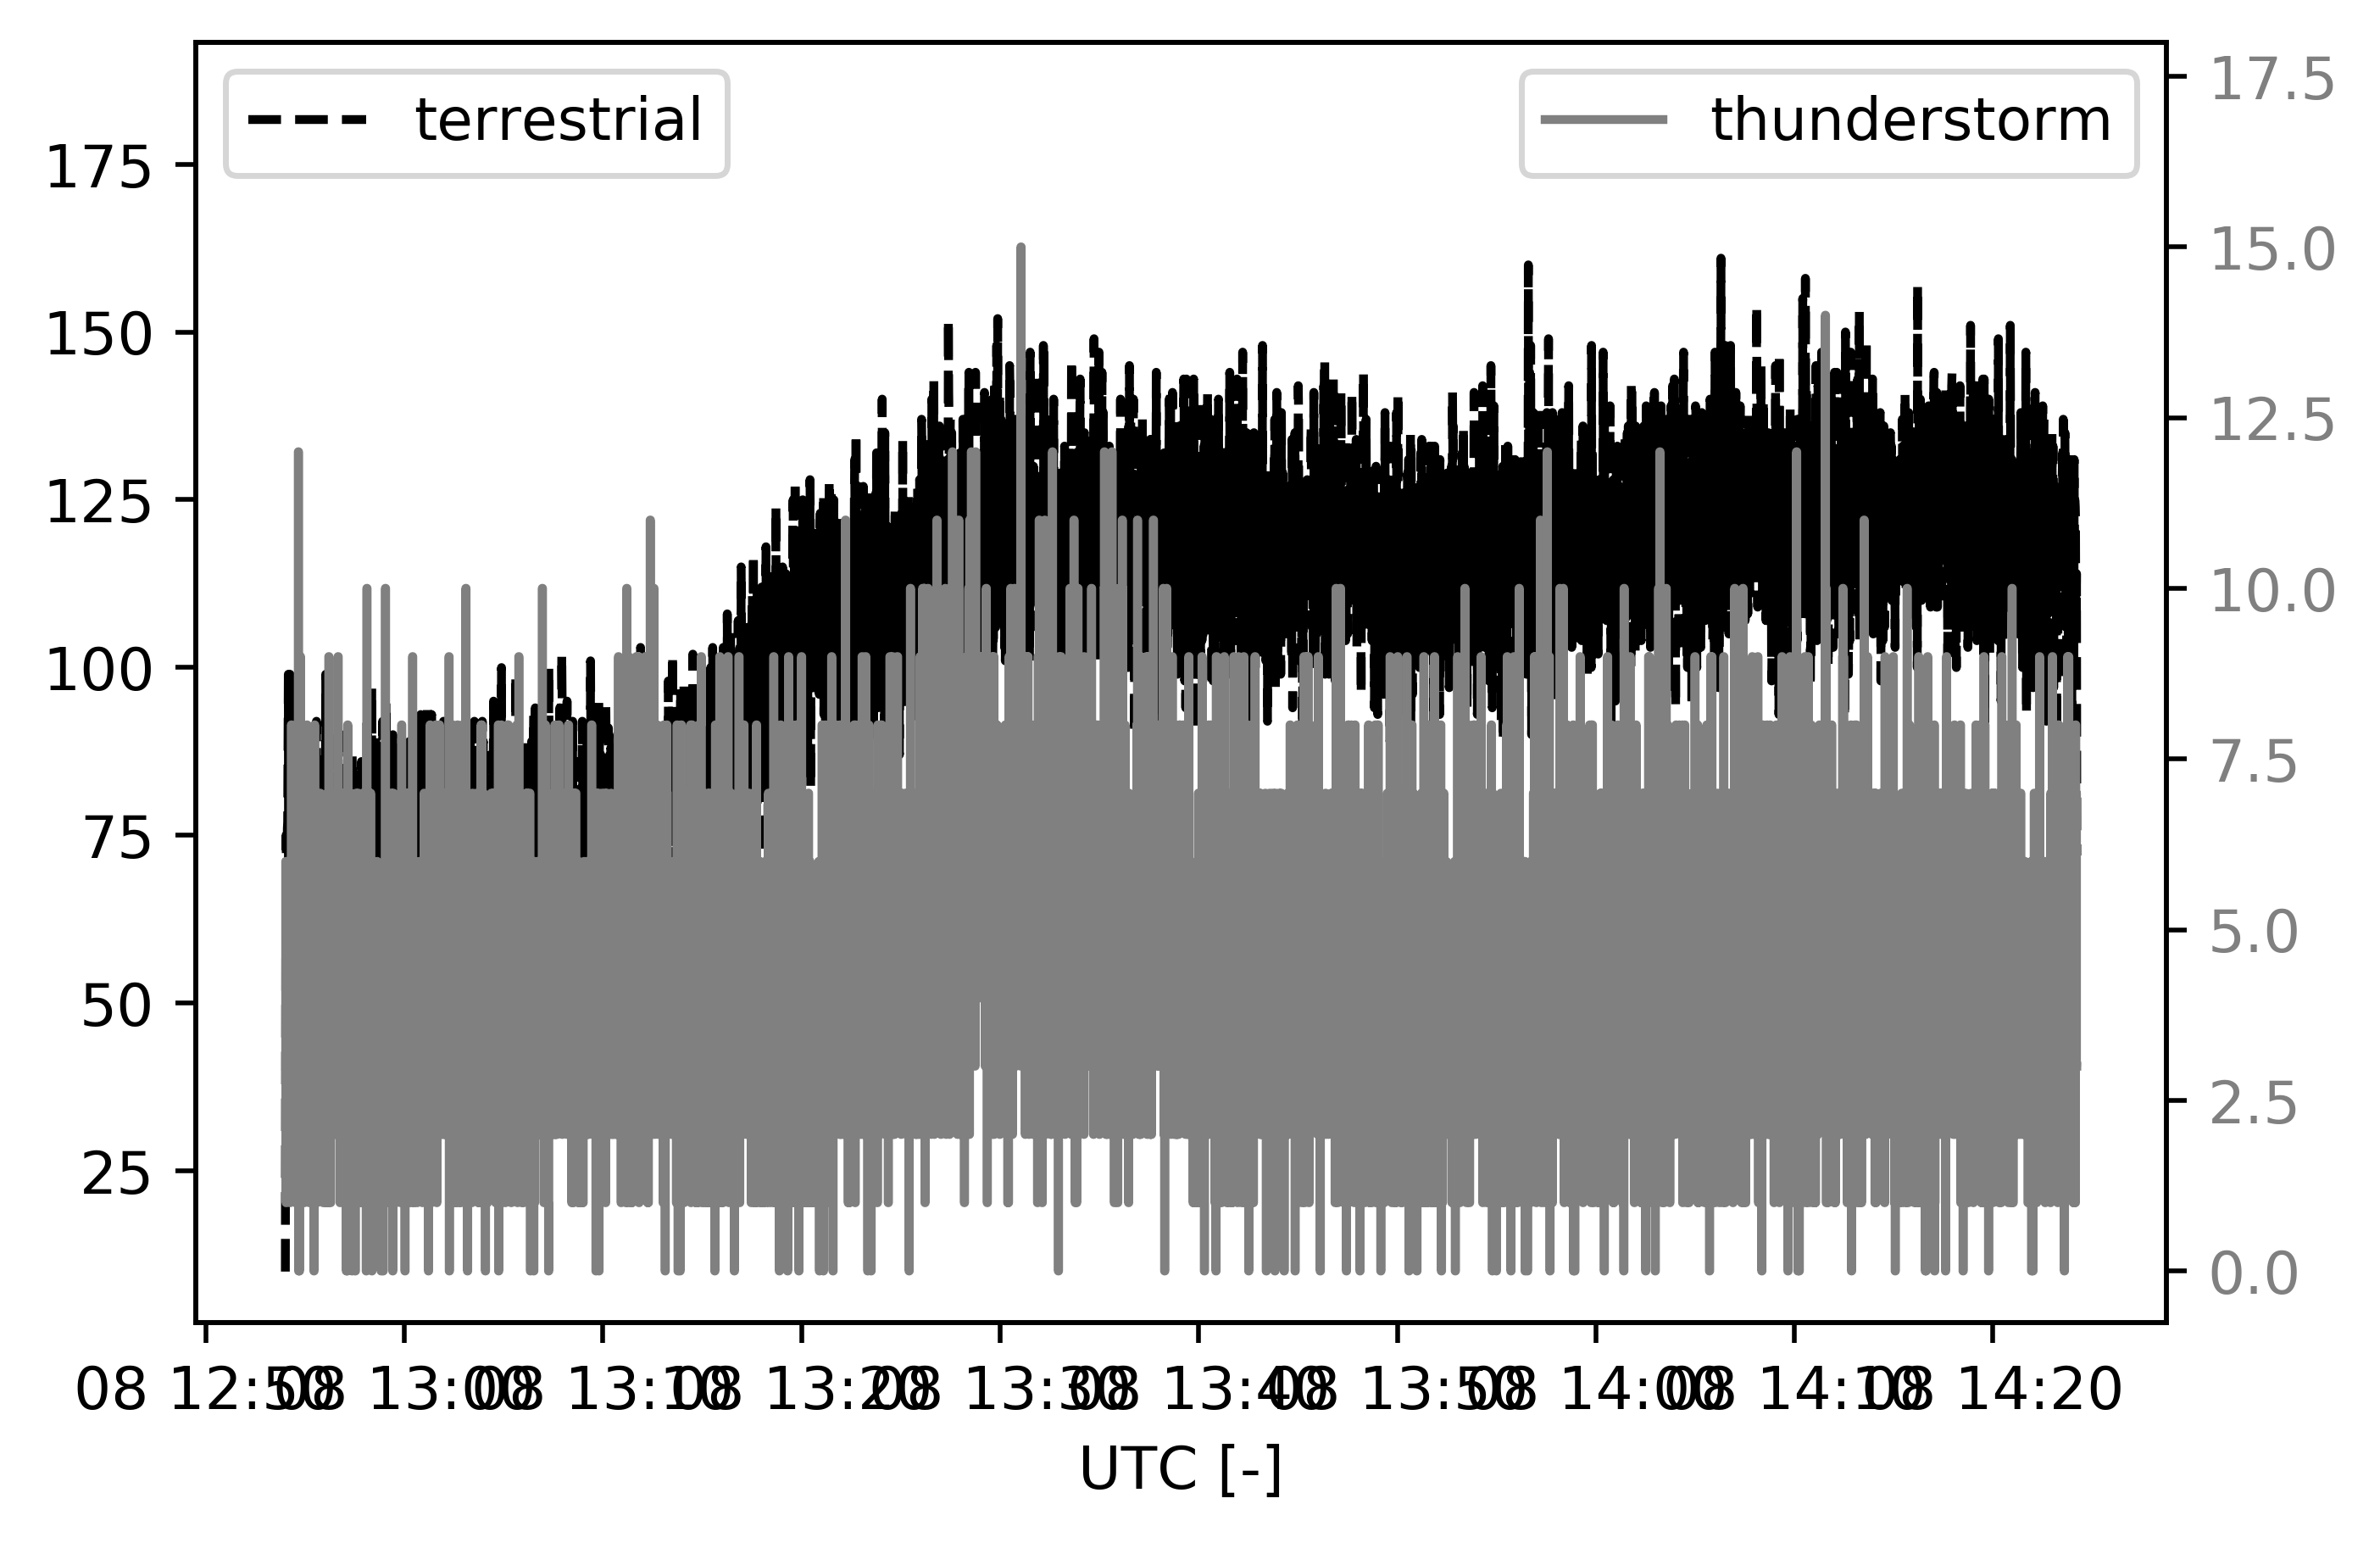

In [95]:
filename = '2021-06-08 13:00:00_14:00:00_0.csv'
components = ([(0, 500), (500, 1800), (1800, 2048)], ['terrestrial', 'thunderstorm', 'cosmic'])
components = ([(0, 500), (500, 1800)], ['terrestrial', 'thunderstorm'])

#{'Height':[list_height, 'count', 'mean', 'min', 'max', 'sum', 'std'], 'Baseline':['mean', 'min', 'max', 'std']}

df = pd.read_csv(filename, index_col=0)
data_timeseries = time_series(df, '1s', components)
plot_time_series(data_timeseries, components, 'Height', 'count')




